<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module7/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Посібник з кластеризації

У величезному світі науки про дані кластеризація - це техніка, яка допомагає нам організувати точки даних у групи на основі їхньої схожості. Уявіть собі кошик з різнокольоровими цукерками. Кластеризація допоможе вам відсортувати ці цукерки по групах, наприклад, всі червоні разом, всі шоколадні разом і так далі. Цей посібник розкриє основні поняття кластеризації для початківців.

**Що таке кластеризація?**

Кластеризація - це неконтрольована техніка машинного навчання. Неконтрольована означає, що у нас немає попередньо маркованих даних (наприклад, «червоні цукерки» або «шоколадні цукерки»). Замість цього алгоритм автоматично знаходить групи (кластери) в даних на основі схожості між точками даних.

![](https://waterprogramming.files.wordpress.com/2022/03/graphic.png?w=1024)


# Як працює кластеризація?

1. **Представлення даних:** Кожна точка даних представлена ознаками (думайте про них як про характеристики). Наприклад, дані про цукерки можуть мати такі характеристики, як колір, смак і вміст цукру.
2. **Вимірювання відстані:** Ми використовуємо метрики відстані, щоб обчислити, наскільки «схожими» є дві точки даних на основі їхніх ознак. Найпоширеніші метрики включають:
    * **Евклідова відстань:** Як відстань по прямій між двома точками на карті.
    * **Манхеттенська відстань:** Загальна відстань, пройдена вздовж кожної осі, щоб дістатися з однієї точки в іншу (уявіть собі таксі, яке проїжджає міські квартали).
3. **Формування кластерів:** Різні алгоритми кластеризації використовують різні підходи до групування точок даних. Ось короткий огляд двох популярних методів:
    * **К-середні:** Цей метод ітеративно приписує точки даних до найближчого «центру» кластера (центроїда), а потім перераховує центр на основі приписуваних точок. Цей процес триває до тих пір, поки кластери не стабілізуються.
    * **Ієрархічна кластеризація:** Цей метод будує ієрархію кластерів або шляхом об'єднання менших кластерів у більші, або шляхом поділу більших кластерів на менші, подібно до генеалогічного дерева.

![](https://miro.medium.com/v2/resize:fit:1400/1*oNt9G9UpVhtyFLDBwEMf8Q.png)

# Дані

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/beverage_r.csv',
                 sep=';',
                 index_col='numb.obs')

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


# Чому нормалізація важлива для кластеризації

Уявіть, що у вас є набір даних з двома характеристиками: зріст (у сантиметрах) і вага (у кілограмах). Якщо ви запустите кластеризацію безпосередньо на цих даних, зріст буде домінувати в розрахунках відстані, оскільки його значення набагато більші. Це може призвести до оманливих кластерів, коли точки з однаковою вагою будуть розділені через різну висоту.

Нормалізація приходить на допомогу! Вона перетворює ваші дані на загальну шкалу, гарантуючи, що всі об'єкти однаково впливають на обчислення відстані. Поширені методи нормалізації включають:

* **Масштабування Min-Max:** Масштабує кожен об'єкт до діапазону від 0 до 1 (або від -1 до 1).
* **Стандартна нормалізація (Z-рахунок):** Віднімається середнє значення кожної ознаки, а потім ділиться на її стандартне відхилення. Це призводить до стандартного нормального розподілу із середнім значенням 0 і стандартним відхиленням 1.

![](https://i.stack.imgur.com/VAbv8.png)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data = scaler.fit_transform(df)

# Розуміння кластеризації за методом K-середніх

K-середні - це алгоритм кластеризації на основі центроїда, який чудово групує точки даних у заздалегідь визначену кількість кластерів (K). Ось розбивка його кроків:

1. **Вибір кількості кластерів (K):** Це дуже важливо! Чарівної формули не існує, але такі методи, як метод ліктя (побудова графіка функції витрат в залежності від K) або Силуетний аналіз (оцінка якості кластерів) можуть допомогти вам у цьому.

2. **Ініціалізація центроїдів:** K-Means випадковим чином вибирає K точок даних як початкові центри кластерів (центроїди). Ці центроїди представляють «ядра» кожного кластера.

3. **Присвоєння точок даних:** Кожна точка даних присвоюється найближчому центроїду на основі обраної метрики відстані (наприклад, евклідова відстань).

4. **Перерахунок центроїдів:** Після того, як всі точки призначені, центроїди перераховуються як середнє значення точок, що належать до кожного кластеру.

5. **Повторення кроків 3 та 4:** Ці кроки (призначення та оновлення центроїдів) повторюються доти, доки не буде досягнуто критерію зупинки (наприклад, центроїди не змістяться суттєво, або не буде досягнуто максимальної кількості ітерацій).

Переваги K-середніх:

* **Ефективність:** K-середні є відносно швидким та ефективним в обчислювальному плані, що робить його придатним для великих наборів даних.
* **Простий у розумінні:** Концепцію K-середніх легко зрозуміти, що робить його чудовою відправною точкою для початківців у кластеризації.
* **Результати, які можна інтерпретувати:** K-середнє розподіляє точки даних на певні кластери, що полегшує інтерпретацію угруповань.

**Важливо пам'ятати:**

* K-середні чутливі до викидів, які можуть спотворювати центри кластерів. Розгляньте методи виявлення та обробки викидів.
* K-Means передбачає сферичні кластери. Якщо ваші дані мають витягнуту або неправильну форму, K-середнє може бути не найкращим вибором.
* Початкове розміщення центроїдів може вплинути на остаточні кластери. Експериментуйте з різними ініціалізаціями, щоб уникнути застрягання в локальних оптимумах.

![](https://www.projectrhea.org/rhea/images/e/ef/RunyanKmeans.gif)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Оцінювання ефективності кластеризації

У нашому попередньому посібнику ми розглянули основи кластеризації - групування точок даних на основі схожості. Але як оцінити якість цих групувань? У цьому посібнику ви дізнаєтеся про показники ефективності, метод ліктя та силуетні діаграми, які допоможуть вам оцінити ефективність кластеризації.

**Показники ефективності кластеризації:**.

Оскільки кластеризація є неконтрольованою (немає попередньо позначених даних), оцінка її ефективності може бути суб'єктивною. Ось деякі загальні метрики для розгляду:

* **Сума квадратичних помилок (SSE):** Цей показник вимірює загальну квадратичну відстань між кожною точкою даних і призначеним для неї центроїдом кластера (середнім значенням). Нижчий показник SSE вказує на більш щільні кластери з меншим розкидом у кожній групі.
* **Коефіцієнт силуету:** Ця метрика враховує як схожість точки даних з призначеним їй кластером, так і її відмінність від точок у сусідніх кластерах. Значення ближче до 1 вказують на кращу кластеризацію, тоді як значення, близькі до 0 або від'ємні, вказують на погано відокремлені кластери.
* **Індекс Калінського-Харабаша:** Ця метрика порівнює середню відстань між кластерами з середньою відстанню всередині кластерів. Вищі значення вказують на добре відокремлені кластери.
* **Індекс Девіса-Болдіна:** Ця метрика враховує як відношення розсіювання всередині кластера до розділення між кластерами, так і кількість кластерів. Нижчі значення свідчать про кращу кластеризацію.

**Пам'ятайте:** Жодна метрика не є ідеальною. Розгляньте можливість використання комбінації метрик, щоб отримати цілісне уявлення про якість кластеризації.

## Метод «ліктя» для вибору K

Важливим етапом кластеризації є вибір оптимальної кількості кластерів (K). Метод ліктя - це візуальна техніка, яка допомагає прийняти це рішення:

1. Запустіть алгоритм кластеризації для різних значень K.
2. Відкладіть функцію вартості (часто SSE) на осі y та кількість кластерів (K) на осі x.
3. Спостерігайте за кривою. Спочатку функція витрат буде швидко зменшуватися зі збільшенням K, що свідчить про формування більш тісних кластерів.
4. Точка «ліктя» на кривій вказує на хороше значення K, коли витрати починають повільно зменшуватися, що свідчить про зменшення прибутку від додавання нових кластерів.

In [5]:
import matplotlib.pyplot as plt

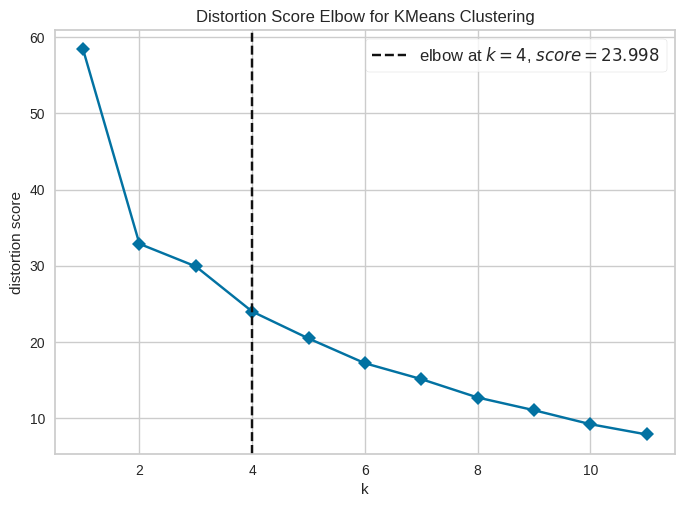

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 12),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

## Візуалізація якості кластерів за допомогою силуетних діаграм

Силуетні діаграми надають графічне представлення коефіцієнта силуету для кожної точки даних. Ось як їх інтерпретувати:

1. На діаграмі кожна точка даних відображається на осі х, а її коефіцієнт силуету - на осі у.
2. Точки з коефіцієнтом силуету ближче до 1 добре узгоджуються з відповідним кластером.
3. Значення, близькі до 0, вказують на те, що точка знаходиться на межі кластерів і потенційно може належати до будь-якого з них.
4. Від'ємні значення вказують на те, що точка може бути неправильно віднесена до поточного кластеру.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


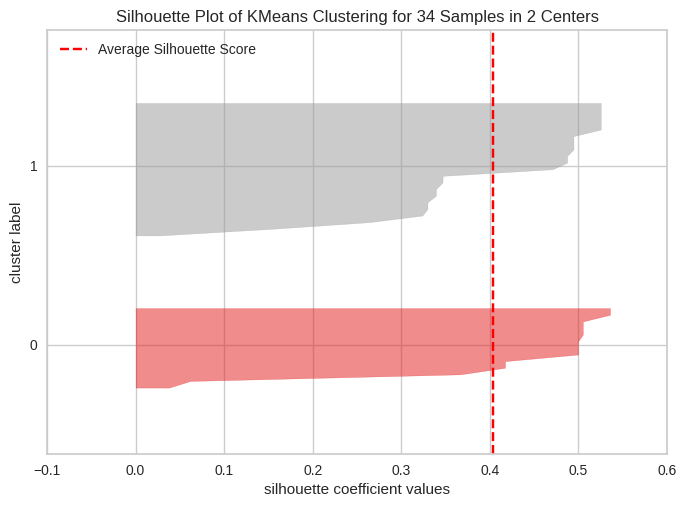

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 34 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data)
visualizer.show()

# Візуалізація самих кластерів

In [8]:
df['cluster_id'] = kmeans.labels_

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster_id
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,2
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,0


In [9]:
df['cluster_id'].value_counts()

cluster_id
0    12
2    11
1    11
Name: count, dtype: int64

In [10]:
results = df.groupby(by='cluster_id').mean()

results

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster_id,,,,,,,,
0,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


<Axes: xlabel='cluster_id'>

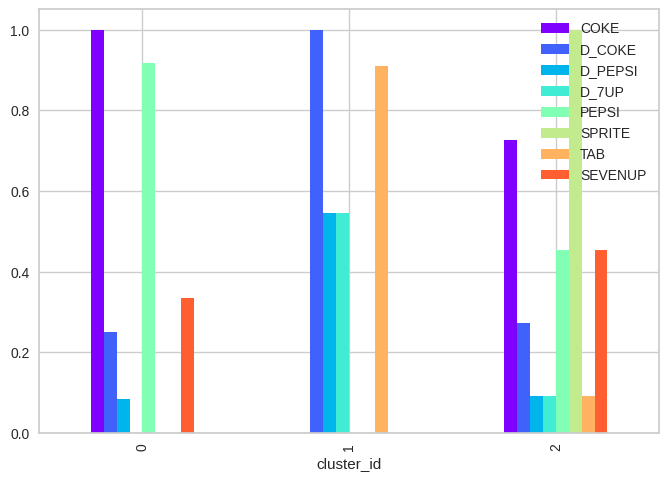

In [11]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

# Виявлення кластерів будь-якої форми

У світі науки про дані алгоритми кластеризації, такі як K-Means, добре працюють зі сферичними кластерами, але що робити, якщо ваші дані мають неправильну форму або різну щільність? Саме тут на допомогу приходить DBSCAN (Density-Based Spatial Clustering of Applications with Noise - просторова кластеризація додатків на основі щільності з шумом). У цьому посібнику розглядається DBSCAN, який допоможе вам виявити кластери довільної форми у ваших даних.

**Виклик з K-середніми:**

Уявіть собі набір даних з кластерами, які не є ідеально круглими. K-Means, популярний алгоритм кластеризації, бореться з такими даними. Він покладається на попередньо визначені центроїди (центри кластерів) і припускає сферичні кластери, що може призвести до неправильного розміщення точок у несферичних областях або до того, що викиди залишаться некластеризованими.

![](https://www.frontiersin.org/files/Articles/1292923/fdata-06-1292923-HTML/image_m/fdata-06-1292923-g001.jpg)

## Можливості DBSCAN:

DBSCAN використовує інший підхід. Він зосереджується на **щільності**:

* **Щільні регіони:** DBSCAN визначає області з високою концентрацією точок даних, розглядаючи ці області як потенційні кластери.
* **Розріджені області:** Точки в областях з низькою щільністю класифікуються як шум, потенційно представляючи викиди або точки даних на периферії кластерів.

**Ключові поняття у DBSCAN:** * **Епсилон (епсилон)

**Епсилон (ε):** Цей параметр визначає максимальну відстань між двома точками, які вважаються сусідами. Точки в межах цієї відстані вважаються щільно упакованими.
* **MinPts (Мінімальна кількість точок):** Цей параметр визначає мінімальну кількість сусідів, яку точка повинна мати, щоб вважатися основною точкою (точкою, яка потенційно належить до кластера). Точки з меншою кількістю сусідів класифікуються як граничні точки (на межі кластерів) або як шум.

**Як працює DBSCAN:**

1. **Почніть з необробленої точки даних.**
2. **Перевірте її околиці:** Якщо точка має достатньо сусідів (принаймні MinPts) в межах епсилонової відстані, вона стає опорною точкою.
3. **Формування кластерів:** Визначте всі точки, які безпосередньо досяжні з центральної точки (точки в межах епсилонової відстані) та їх сусідів в межах епсилонової відстані (рекурсивний процес). Ці з'єднані точки утворюють кластер.
4. **Обробка решти точок:** Якщо точка не є опорною і не належить до жодного з існуючих кластерів на основі досяжності, вона класифікується як шум.

**Переваги DBSCAN:**

* **Обробляє кластери довільної форми:** DBSCAN чудово ідентифікує кластери різної форми та щільності, на відміну від K-середніх, які припускають сферичні кластери.
* **Немає заданої кількості кластерів:** На відміну від K-середніх, де ви вказуєте кількість кластерів (K), DBSCAN автоматично виявляє кластери на основі щільності.

**Проблеми DBSCAN:**

* **Чутливість параметрів:** Продуктивність DBSCAN сильно залежить від вибору правильних значень епсилон (ε) та MinPts. Часто потрібен експеримент.
* **Прокляття розмірності:** DBSCAN може бути дуже дорогим в обчислювальному плані для даних високої розмірності через необхідність обчислювати відстані між точками.

![](https://miro.medium.com/v2/resize:fit:1280/1*-eCxHTeWqaKdS-nvOSCjfQ.gif)

In [12]:
!pip install -q kneed

1.0


<Figure size 500x500 with 0 Axes>

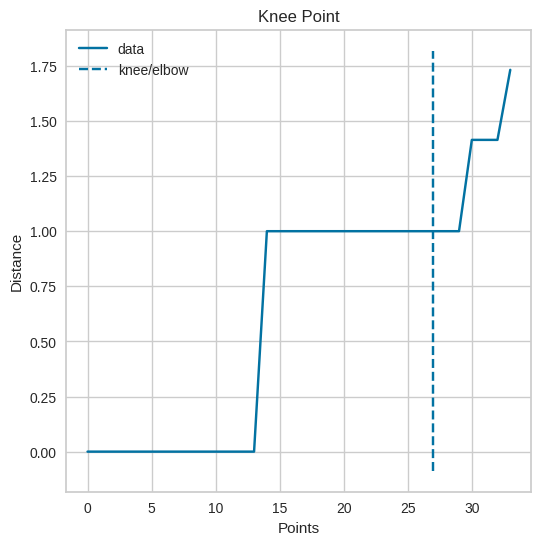

In [46]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,-1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


print(distances[knee.knee])

In [41]:
distances, indices = neighbors.kneighbors(data)

distances.shape

(34, 3)

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=3)

dbscan.fit(data)

DBSCAN(eps=1, min_samples=3)

# Візуалізація самих кластерів

In [15]:
df['cluster_id'] = dbscan.labels_

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster_id
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,0
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,0


In [16]:
df['cluster_id'].value_counts()

cluster_id
 0    20
 1    11
-1     3
Name: count, dtype: int64

In [17]:
results = df.groupby(by='cluster_id').mean()

results

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster_id,,,,,,,,
-1,0.333333,0.666667,0.333333,0.333333,0.0,1.0,0.333333,0.666667
0,0.950000,0.200000,0.050000,0.000000,0.8,0.4,0.000000,0.350000
1,0.000000,1.000000,0.545455,0.545455,0.0,0.0,0.909091,0.000000


<Axes: xlabel='cluster_id'>

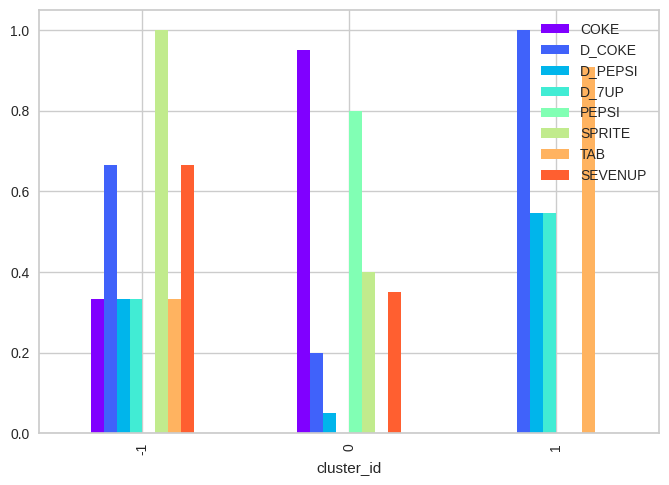

In [18]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

def plot_silhouette(n_clusters, data, cluster_labels):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data[cluster_labels != -1],
                                      cluster_labels[cluster_labels != -1])
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

For n_clusters = 2 The average silhouette_score is : 0.5241271565408143


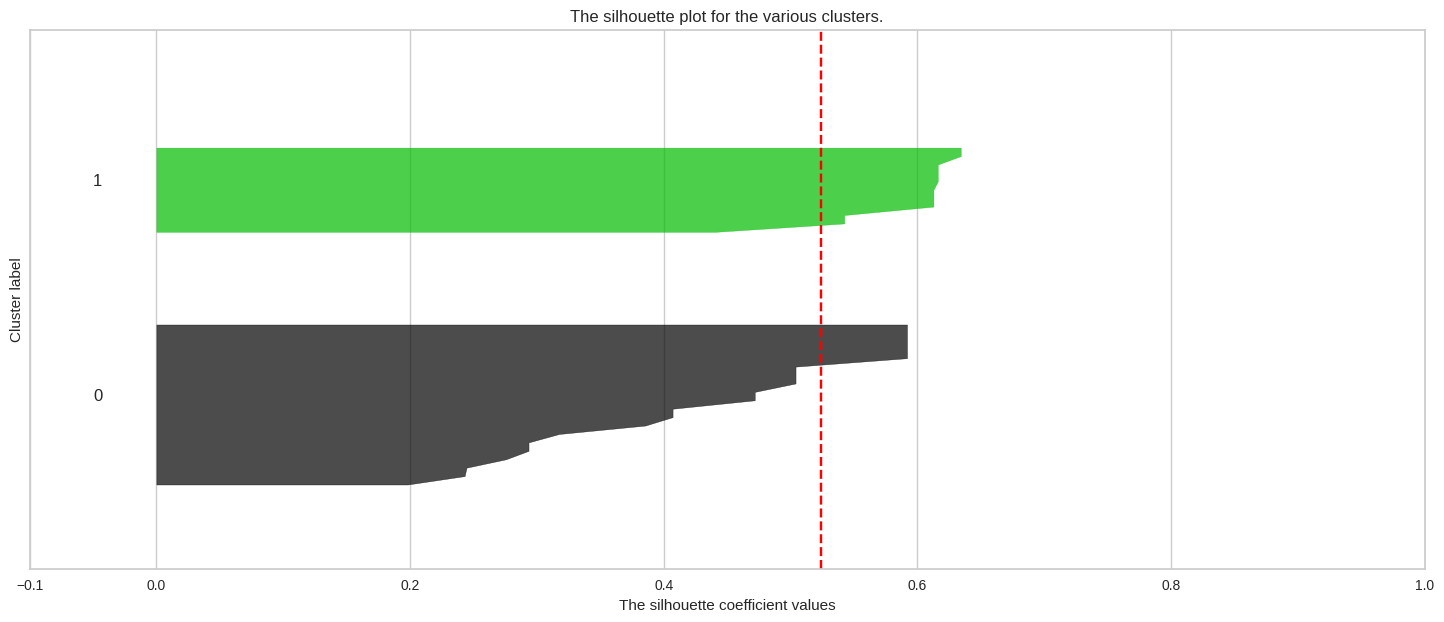

In [39]:
plot_silhouette(2, df, cluster_labels=dbscan.labels_)